# Aprendizaje Supervizado - Clasificación


En la sección se cubre lo siguiente:

* Clasificación
* Algo de Teoría
* Otros clasificadores
* Ejercicios

## Clasificador

Como previamente se [mencionó](01_Aprendizaje_Automático.ipynb), cuando en la relación $$ Y=f(X)+\epsilon$$ la $Y$ es una variable categórica se tienen un problema de clasificación. La variable $X$ en esta relación representa la matriz de datos y $f()$ representa al algoritmo o modelo que se use para estimar $Y$.

### Nota:

Para el ejemplo se usan los datos sobre [incumplimiento de pago](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients), para mayores detalles al respecto se puede leer el artículo:

* [Yeh, I. C., & Lien, C. H. (2009).The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients.](https://pdfs.semanticscholar.org/1cac/ac4f0ea9fdff3cd88c151c94115a9fddcf33.pdf)


### Sobre el ejemplo

Se explican brevemente los detalles y se agregan comentarios al código para seguir los pasos realizados.

In [1]:
#Se cargan las bibliotecas y se configura el entorno para generar gráficos

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuracion Matplotlib
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15


Los datos se encuentran ubicados dentro del folder *DataSets*, tambiém se pueden descargar directamente del [repositorio.](https://archive.ics.uci.edu/ml/datasets.html)

In [2]:
#Se cargan los datos

Datos=pd.read_excel("DataSets/default_of_credit_and_clients.xls")

Se hace una pequeña revisión de los datos. Se visualizan los primeros 5 registros, se revisa el tamaño de la muestra y  el tipo  variables y se ve la proporción de registros para cada una de las categorías de $Y$. 

In [3]:
#Se visualizan los primeros 5 registros
Datos.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#El tamaño de la muestra
Datos.shape

(30000, 25)

In [10]:
#El tipo de variables
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
#Balance de la  variable categorica a predecir

Datos.iloc[:,24].value_counts().div(30000)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

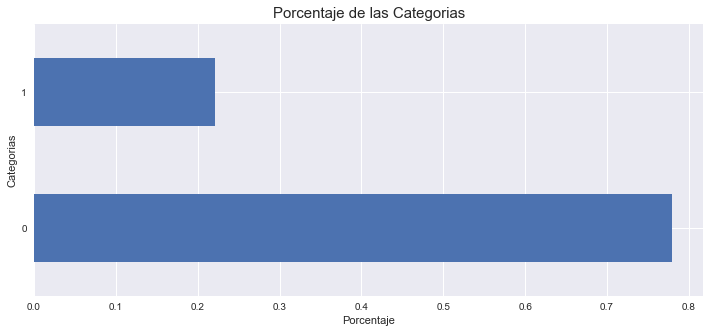

In [4]:
#Se genera un gráfico para visualizar el porcentaje de cada categoría de la variable a predecir
Datos.iloc[:,24].value_counts().div(30000).plot(kind='barh')
plt.title("Porcentaje de las Categorias")
plt.ylabel("Categorias")
plt.xlabel("Porcentaje")

Se observa que de las 25 variables, 23 son usadas para predecir la variable de nombre *default payment next month*. El tamaño de la muestra es de 30,000 registros.

En la variable respuesta( o dependiente) o la variable $Y$, se denota con "1=Si realiza el pago" y "0= No realiza el pago". Se tiene un 22.12% se casos que realizan el pago(Y=1).

Se separa el conjunto de variables de la variable repuesta, para dividir los datos entre el conjunto de entrenamiento y prueba,se  considera la muestra estratificada para tratar de conservar los porcentajes casos 0/1.

Visualizamos el comportamiento del sexo y la edad entre la gente que paga o no. También exploramos la relación entre la educación y la edad.

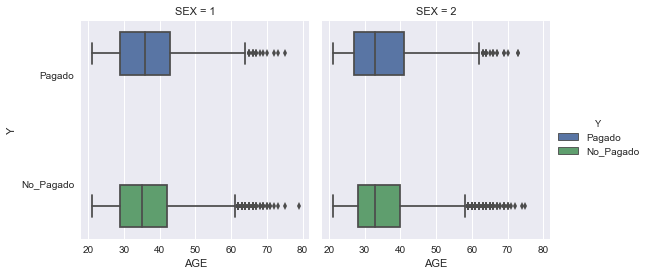

In [8]:
#construimos un subconjunto de variables para explorar la relació
Datos_1=Datos.iloc[:,[2,3,4,5,24]].copy()
#Se nombran las columnas del DataFrame
Datos_1.columns=['SEX','EDUCATION','MARRIAGE','AGE','Y']
#Se cambia la variable dependiente por una categoría con texto
Datos_1.loc[:,'Y']=Datos_1.Y.apply(lambda x: "Pagado" if(x==1)  else "No_Pagado")

sns.factorplot(x="AGE", y="Y", hue="Y",col="SEX", data=Datos_1, kind="box")

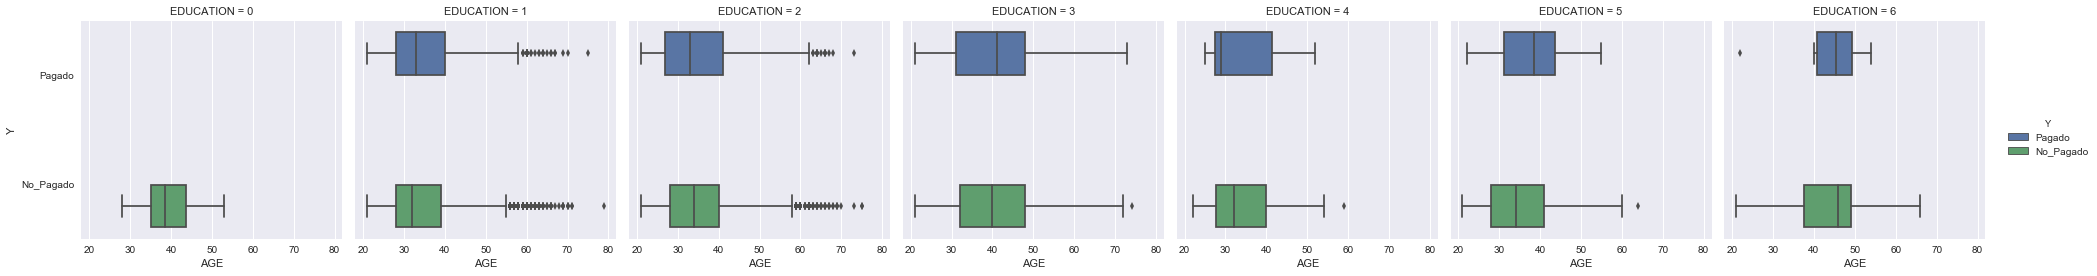

In [9]:
sns.factorplot(x="AGE", y="Y", hue="Y",col="EDUCATION", data=Datos_1, kind="box")

Vemos que el sexo resulta no del todo importante para diferenciar entre si una persona pagará o no, pero las categorías de educación si muestran diferentes comportamientos.

In [8]:
#Creación de datos para el modelo de clasificación

Datos_input=Datos.iloc[:,0:24].copy()
Y_output=Datos.iloc[:,24].copy()

In [9]:
#Se divide la muestra entre el conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Datos_input, Y_output,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=Y_output)

In [12]:
a=len(y_train)
y_train.value_counts().div(a)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [13]:
#Visualización de la muestra de datos

X_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4051,4052,200000,2,2,1,29,0,0,0,0,...,73928,72060,72393,72969,3304,3815,3004,3006,4012,3012
6106,6107,150000,1,3,1,62,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
28889,28890,300000,2,4,2,45,1,-1,-1,-2,...,0,0,0,0,1669,0,0,0,0,289
12721,12722,90000,2,3,2,25,0,0,0,0,...,45868,47535,40920,38622,1861,2052,2719,0,1600,890
26257,26258,90000,2,1,2,33,0,0,0,0,...,59753,61755,63629,54423,2100,4000,3000,3000,2323,2000


Se aplica un modelo de *Regresión Logística* y se mide la precisión del modelo. La *precisión* en scikit-learn se calcula mediante la función `accuracy_score()`.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Modelo_LR=LogisticRegression()
Modelo_LR.fit(X_train.iloc[:,1:24],y_train)
Pred_LR=Modelo_LR.predict(X_test.iloc[:,1:24])

print("Regresion Logística")
print("La precisión del modelo fue %f"%(accuracy_score(y_test,Pred_LR)))

Regresion Logística
La precisión del modelo fue 0.778667


Se obtuvo una pecisión del **77.86%** (visto en porcentaje). El modelo se aplicó a los datos de prueba con categorías balanciadas (por la estratificación que se realizó).

Otro modo de obtener el valor de la precisión del modelo de clasificación es:

In [15]:
#Usando un método del modelo definido

Modelo_LR.score(X_test.iloc[:,1:24],y_test)

0.77866666666666662

## Aspectos Teóricos de la clasificación

Tenemos que  $Y \in \{1,0\}$, por otro lado en nuestro ejemplo $X \in \mathbb{R}^{30000 \times 23}$, de manera general problema puede verse como un conjunto de tuplas $$(X_1,Y_1),...,(X_n,Y_n)$$ donde $(X_j,Y_j) \in \mathbb{X} \times \mathbb{Y}$ las cuales son tomadas vistas como variables aleatorias independientes.

Así púes, el objetivo de la clasificación binaria es construir una "regla" o función tal que $$h:\mathbb{X} \longrightarrow \{0,1\}$$

Algunas de las consideraciones naturales sobre la función $h$, es que la variable $Y$ tienen una distribución de Bernoulli. Sin hacer algún supuesto sobre $X$, la relación entre $h$ y los datos queda planteado como $$Y |X \approx Ber(h(X))$$, donde $h(X)=\mathbb{P}(Y=1|X)=\mathbb{E}[Y|X]$ y con $Ber$ indicamos que es una distribución de Bernoulli.


Para el caso concreto de la regresión logística, resulta que la función $h()$ o clasificador,para este problema es dada como:$$h(X)=\frac{1}{1+e^{-X}}$$


Aunqué es muy breve la explicación teórica y quizás se vuelve muy confusa,pero poniendo la explicación en el ejemplo realizado se tienen lo siguiente. La muestra fue formada por $30000$ tuplas de 24 elementos $(x_1,x_2,...,x_23,y)$. Se propuso como función $h$ la relacionada con la regresión logística.

## Otros Clasificadores

El modelo de *Regresión Logística* permitió tener un 77.86% de precisión. Tomamos otro modelo, se usará un Random Forest, el cual es una generalización de los Árboles de Decisiones.

De momento se usa la función solo a manera de ejemplo como aplicar otra función de clasificación.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Modelo_RF=RandomForestClassifier()
Modelo_RF.fit(X_train.iloc[:,1:24],y_train)
Pred_RF=Modelo_RF.predict(X_test.iloc[:,1:24])

print("Random Forest")
print("La precisión del modelo fue %f"%(accuracy_score(y_test,Pred_RF)))

Observamos que resulta dar mejores resultados el modelo de Regresión Logística, con un **5%** de mejora en la precisión.

# Ejercicios

Para los ejercicios se hace uso de la misma muestra de datos del ejemplo.

In [1]:
# 1.- Dividir la muestra de datos en un porcentaje de 80/20; train/test respectivamente.

In [ ]:
# 2.- Aplicar la Regresión Logística y el RandomForest,¿cuáles fueron los porcentajes de precisión?

In [ ]:
# 3.- Ejecuta el siguiente código, sustituyendo los nombres de las Muestras de Entrenamiento y Prueba que se generaron en el ejercicio 1.

from sklearn.svm import SVC

Modelo_SVC=SVC()
Modelo_SVC.fit(Data_train,Target_train)
Pred_SVC=Modelo_SVC.predict(Data_test)

print("Máquina de Soporte Vectorial")
print("La precisión del modelo fue %f"%(accuracy_score(Target_test,Pred_SVC)))

#¿Cuál de los 3 clasificadores tuvo la mejor precisión?

In [4]:
# 4.- Escribe el código similar al ejercicio 3 pero para las siguientes 3 funciones de clasificación:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
